###Анализ влияния социально-экономических и демографических факторов на уровень зарегистрированных преступлений на 10 000 человек в регионах России в 2022 году

Работу выполнил:  
студент 3 курса  
Артемьев Александр Вячеславович

Импортируем необходимые библиотеки

In [33]:
!pip install wget
!pip install shap
import shap

import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score,auc

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#### 1)Сформулировать содержательно задачу исследования. Выбрать целевую переменную. Построить полиномиальную регрессию. Определить степень полинома, про которой коэффициент детерминации достигает 1. Показать, что результат достигнут за счет переобучения модели. Выбрать оптимальную степень полинома или показать нецелесообразность построения полиномиальной регрессии (1 балл).

Используемые информационные источники
1. Сайт Государственной прокуратуры Российской Федерации :
https://epp.genproc.gov.ru/web/gprf/activity/crimestat
2. Федеральная служба государственной статистики:
https://rosstat.gov.ru/

С течением времени изменяется уровень преступности и появляются
новые виды правонарушений, что оказывает огромное влияние на различные
сферы общества:  
• Заболеваемость и смертность населения  
• Экономические кризисы и спад производства  
• Материальный и моральный вред, причиненный обществу  
• Падение качества жизни населения  
Исследование зависимостей между социально-экономическими
показателями и уровнем преступности в регионах Российской Федерации
является актуальным и необходимым, ведь нахождение факторов,
объясняющих целую структуру правонарушений, поможет разработать
эффективные меры по снижению количества преступлений. Что напрямую
окажет положительное влияние на все общество в целом. Исследование
проводится на данных за 2022 год.

**Цель исследования:** Выявить влияние социально-экономических, демографических и инфраструктурных факторов на уровень преступности в российских регионах в 2022 году. Построить модель, которая бы отражала зависимость количества преступлений от этих факторов.  
**Список используемых показателей для анализа**:  
Целевая переменная:  
y - Зарегистрированно преступлений на 10000 чел., за 2022 год  
Независимые переменные:  
$x_{1}-$Процент населения людей региона в возрасте старше трудоспособного  
$x_{2}-$Уровень безработицы   
$x_{3}-$Количество спортивных
сооружений на 1000 человек  
$x_{4}-$Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации  
$x_{5}-$Прожиточный минимум  
$x_{6}-$Ожидаемая продолжительность жизни при рождении (число лет)

**Обоснование выбранных переменных для регрессионого анализа**:  
1. Процент населения в возрасте старше трудоспособного – пожилые люди могут представлять уязвимую группу населения, склонную к большему риску стать жертвами преступлений.  
2. Уровень безработицы – более высокий уровень безработицы может повышать вероятность правонарушений.  
3. Количество спортивных сооружений на 1,000 человек – может иметь двоякое влияние на уровень преступности. С одной стороны, наличие спортивных объектов может способствовать снижению преступности, предоставляя молодежи и другим группам возможность активно проводить досуг. С другой стороны, в некоторых случаях спортивные сооружения могут стать местами скопления людей, что может увеличивать вероятность конфликтов или мелких правонарушений.  
4. Количество собственных легковых автомобилей на 1000 человек - в регионах с более низким уровнем личной автомобилизации население чаще вынуждено пользоваться общественным транспортом, который может находиться не в шаговой доступности от дома. Это создает необходимость передвигаться по менее освещенным или удаленным участкам города, увеличивая вероятность столкновения с потенциально опасными ситуациями, особенно в ночное время.  
5. Прожиточный минимум – как показатель уровня жизни населения, может также быть связан с уровнем преступности.  
6. Ожидаемая продолжительность жизни - в регионах с более высокой ожидаемой продолжительностью жизни обычно наблюдается более высокий уровень социальной стабильности, доступности медицинской помощи и образования, что снижает вероятность криминального поведения.  
Выбор target переменной был обоснован в самом начале работы, единственное, что хотелось бы добавить:  
Было принято решение использовать именно этот относительный, а не
абсолютный показатель для исследования уровня преступности. Для
абсолютного показателя – количество преступлений, проводимое
исследование нецелесообразно, так как для двух субъектов с существенным
отличием в населении, существенно бы отличался уровень преступности, когда независимые переменные имели бы схожие значения.

Наконец загрузим наш dataset, размещенный на git hub.

In [34]:
wget.download('https://raw.githubusercontent.com/Vealar/Mainor_IHW1/refs/heads/main/data-5.csv')

'data-5 (1).csv'

In [35]:
data = pd.read_csv('/content/data-5.csv',sep=',', index_col=0,encoding='utf-8')
data.sample(5)

,"Зарегистрированно преступлений на 10000 чел., за 2022 год",Процент населения в возрасте старше трудоспособного,Уровень безработицы,Количество спортивных сооружений на 1000 человек,Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации,Прожиточный минимум,Ожидаемая продолжительность жизни при рождении (число лет)
Субъект РФ,,,,,,,
Волгоградская область,147.08,25.2,3.5,1.56,427.82,10882.0,73.24
Республика Башкортостан,126.82,23.1,3.4,2.45,392.08,11009.0,72.98
Краснодарский край,135.61,24.2,3.6,1.46,305.22,12148.0,72.92
Ямало-Ненецкий автономный\nокруг,120.57,12.3,1.6,1.72,352.40,18029.0,74.82
Новосибирская область,168.38,23.7,4.7,1.33,351.68,12775.0,71.49


Убедимся, что наши данные не содержат пропусков и представляют из себя непрерывные числовые переменные

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 7 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Зарегистрированно преступлений на 10000 чел., за 2022 год                                                85 non-null     float64
 1   Процент населения в возрасте старше трудоспособного                                                      85 non-null     float64
 2   Уровень безработицы                                                                                      85 non-null     float64
 3   Количество спортивных сооружений на 1000 человек                                                         85 non-null     float64
 4   Количество собственных легковых автомобилей на 1000 человек насе

Для дальнейшей работы переименуем наши признаки.

In [37]:
data.columns = ['target','x1','x2','x3','x4','x5','x6']

Следующий шаг - построение полиномиальной регрессии. Для обучения будем использовать 70% нашей выборки, которые выберем случайно с зафиксированным random state = 42, для воспроизводимости результатов. Построим полиномы от 1 до 6 степени. Также перед обучением проскалируем данные, чтобы сделать процесс обучения более стабильным и уменьшить переобучение.

In [38]:
# Расчет метрик
def show_metric(y_pred,y_act):
    r2 = r2_score(y_act, y_pred)
    mse = root_mean_squared_error(y_act, y_pred)
    return (r2,mse)
# Обучение полинома нужной степени
def polynom(deg, X, y):

    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Скалирование данных
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    p = PolynomialFeatures(degree=deg)

    X_train_p = p.fit_transform(X_train_s)
    X_test_p = p.transform(X_test_s)

    model = LinearRegression()
    model.fit(X_train_p, y_train)

    y_train_pred = model.predict(X_train_p)
    y_test_pred = model.predict(X_test_p)

    r2_train, mse_train = show_metric(y_train_pred,y_train)
    r2_test, mse_test = show_metric(y_test_pred,y_test)

    return r2_train, mse_train, r2_test, mse_test

In [39]:
X = data.drop(columns = 'target').values
y = data['target'].values


# Обучение полиномов степеней от 1 до 6
for i in range(1, 7):
    r2_train, mse_train, r2_test, mse_test = polynom(i,X,y)
    print(f'Degree: {i}\
     R2_train: {r2_train:.3f}, RMSE_train: {mse_train:.3f},\
     R2_test: {r2_test:.3f}, RMSE_test: {mse_test:.3f}')

Degree: 1     R2_train: 0.569, RMSE_train: 24.712,     R2_test: 0.576, RMSE_test: 23.795
Degree: 2     R2_train: 0.863, RMSE_train: 13.921,     R2_test: -10.332, RMSE_test: 122.943
Degree: 3     R2_train: 1.000, RMSE_train: 0.000,     R2_test: -647.861, RMSE_test: 930.297
Degree: 4     R2_train: 1.000, RMSE_train: 0.000,     R2_test: -1262.694, RMSE_test: 1298.275
Degree: 5     R2_train: 1.000, RMSE_train: 0.000,     R2_test: -32538.892, RMSE_test: 6588.001
Degree: 6     R2_train: 1.000, RMSE_train: 0.000,     R2_test: -33015.016, RMSE_test: 6636.023


Как мы видим степень полинома при которой коэффициент детерминации достигает еденицы - 3.  
Стоит отметить, что такой результат достигнут из - за переобучения модели.   
Для степени полинома $\geq$3: R2_train = 1, RMSE_train = 0 - модель идеально запоминает данные и безошибочно определяет target, когда же на test выборке R2 значительно < 0 и огромный rmse(930.297,1298.275,6588.001,6636.023).   
Это показывает что с увеличением степени полинома модель становится слишком сложной и подстраивается под каждую точку тренировочного набора данных.   
Как итог модель теряет способность обобщать и ошибки на тестовой выборке резко увеличиваются.Значение коэффициента детерминации <0 указывает на то, что модель регрессии не только плохо объясняет вариативность целевой переменной, но и предсказывает хуже, чем простая средняя целевой переменной.  
Что касается двух оставшихся моделей со степенями 1 и 2.  


*   Degree = 1. Мы видим, что модель не переобучена и значения мтерик на train и test незначительно отличаются. В целом модель неплохо описывает данные для r2_train = 0.569 и r2_test = 0.576  
*   Degree = 2. Стоит отметить, что и для степени 2 полином переобучается, хоть и не так явно, в сравнении с остальными случаями. Также значение метрик на test R2_test: -18.478, RMSE_test: 161.183 критически низкое.



Как итог: единственая модель, которая имеет достойные результаты как для R2, так и для RMSE - это полином 1 степени. Все остальные модели переобучены и значительно хуже описывают тестовую выборку. Таким образом полиномы степени хотя бы 2 использовать нецелесообразно, так как они переобучаются, а полином степени 1 представляет из себя просто модель линейной регрессии, поэтому проще использовать лин.рег. для дальнейшего исследования.

### 2)Используя PCA выделить нужное количество главных компонент, описывающих более 70% дисперсии данных. Целевая переменная не включается. Дать содержательную интерпретацию каждой из главных компонент. Построить модель линейной регрессии по выделенным главным компонентам. Использовать разделение на обучающую и тестовую выборки. Сравнить качество модели на обучении и тесте. Описать полученные результаты (1 балл).

In [40]:
def MainComponentsPCA(exp_var, X):
  scaler = StandardScaler()
  X_s = scaler.fit_transform(X)

  pca = PCA()
  X_pca = pca.fit_transform(X_s)

  var = np.cumsum(pca.explained_variance_ratio_)
  print(f"Доли объясненной дисперсии для компонент: {var}")
  n_comp = np.argmax(var >= exp_var) + 1
  print(f"Количество главных компонент описывающих > 70% дисперсии: {n_comp} ГК")

  return n_comp,X_pca,pca

def LinRegPCA(n_comp, X_pca, y):
    X_pca_n = X_pca[:, :n_comp]
    X_train, X_test, y_train, y_test = train_test_split(X_pca_n, y, test_size=0.4, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train, rmse_train = show_metric(y_train_pred,y_train)
    r2_test, rmse_test = show_metric(y_test_pred,y_test)

    return r2_train, rmse_train, r2_test, rmse_test

In [41]:
X = data.drop(columns = 'target').values
y = data['target'].values

n_comp, X_pca, pca = MainComponentsPCA(0.7,X)
r2_train, rmse_train, r2_test, rmse_test = LinRegPCA(n_comp,X_pca,y)

print(f'\nR2_train: {r2_train:.3f}, RMSE_train: {rmse_train:.3f},\
        R2_test: {r2_test:.3f}, RMSE_test: {rmse_test:.3f}\n')

for i, component in enumerate(pca.components_[:n_comp]):
    print(f"ГК {i + 1}: {component}")

Доли объясненной дисперсии для компонент: [0.38198925 0.62360428 0.77059853 0.8775038  0.9634915  1.        ]
Количество главных компонент описывающих > 70% дисперсии: 3 ГК

R2_train: 0.486, RMSE_train: 27.373,        R2_test: 0.435, RMSE_test: 27.037

ГК 1: [ 0.54015536 -0.49741787  0.38687643  0.44418201 -0.10566338 -0.32042452]
ГК 2: [-0.3528951  -0.09681059  0.15271734 -0.03624997  0.73259616 -0.5520498 ]
ГК 3: [-0.01611399  0.40662655  0.73210971 -0.39757676 -0.29769299 -0.22742507]


Для начала выделяем главные компоненты в pca, раз у нас 6 признаков, то и ГК 6. Затем мы вывели доли объясняемой диспресии для компонент, откуда можно понять - 3 ГК объясняют > 70% дисперсии.  
Давайте интерпретируем полученные ГК:  
$x_{1}-$Процент населения людей региона в возрасте старше трудоспособного  
$x_{2}-$Уровень безработицы   
$x_{3}-$Количество спортивных
сооружений на 1000 человек  
$x_{4}-$Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации  
$x_{5}-$Прожиточный минимум  
$x_{6}-$Ожидаемая продолжительность жизни при рождении (число лет)  

ГК 1)[ 0.54015536 -0.49741787  0.38687643  0.44418201 -0.10566338 -0.32042452].  

Больше всего на ГК влияет процент населения старше трудоспособного возраста (0.54015536), то есть увеличение его увеличивает 1 ГК. Из всех коэффициентов выделяется Прожиточный минимум(-0.10566338), который оказывает наименьшее влияние на ГК. Остальные коэфф. варьируют абсолютные значения от 0.32 до 0.49. Причем некоторые положительно влияют на ГК: Количество спортивных
сооружений на 1000 человек(0.38687643) и Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации(0.44418201). А некоторые при увеличении уменьшают ГК : Уровень безработицы(-0.49741787) и Ожидаемая продолжительность жизни при рождении (-0.32042452). ГК отражает баланс региональных социальных и экономических факторов, влияющих на уровень преступности.

ГК 2) [-0.3528951  -0.09681059  0.15271734 -0.03624997  0.73259616 -0.5520498 ].  

Если 1 ГК сочетала вклады всех признаков в разных долях, то для 2 ГК ситуация изменяется. Стоит сразу отметить Прожиточный минимум(0.73259616) - который имеет наибольший коэффициент, соответственно больше всего влияет на ГК 2 и Ожидаемая продолжительность жизни при рождении (-0.5520498), чуть меньше по абсолютному значению, но наибольший по модулю отрицательный коэфф. Видимо эта компонента характеризует в первую очередь здоровье и экономическое благосостояние региона. Уровень безработицы (-0.09681059) и Количество собственных легковых автомобилей (-0.03624997) имеют коэффициенты близкие к 0 и почти не вносят вклад в ГК 2. Остальные признаки - Процент населения людей региона в возрасте старше трудоспособного (-0.3528951) и Количество спортивных
сооружений на 1000 человек  (0.15271734) вносят средний вклад в формирование компоненты.

ГК 3)[-0.01611399  0.40662655  0.73210971 -0.39757676 -0.29769299 -0.22742507]   

Для 3 ГК почти не оказывает влияние - Процент населения людей региона в возрасте старше трудоспособного(-0.01611399).  Среднее влияние окызвают факторы: Прожиточный минимум (-0.29769299) и Ожидаемая продолжительность жизни при рождении (-0.22742507). И наибольшее влияение на ГК оказывают Уровень безработицы,Количество спортивных
сооружений на 1000 человек и Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации . Возможно эта ГК судя по коэффициентам, в значительной степени отражает значимость уровня инфраструктуры для уровня преступности в регионе.   
Полученная модель из 3 ГК имеет следующие метрики качества:  
R2_train: 0.486, RMSE_train: 27.373,        R2_test: 0.435, RMSE_test: 27.037.  
В целом модель слабо предсказывает значения, исходя из R2 = 0.435. Значения на train и test соответствующих метрик не сильно различаются, что говорит об отсутствии переообучения и устойчивости модели.


### 3)Провести бинаризацию целевой переменной следующим образом: значения, превышающие значения третьего квартиля - 1, остальные 0. Построить модель логистической регрессии со значимыми коэффициентами. Привести интерпретацию полученных результатов. Необходимо использовать разделение на обучающую и тестовую выборки. Сравнить качество модели на разных выборках. Для оценки качества модели использовать метрики Accuracy, матрицу ошибок и ROC- кривую. Описать полученные результаты, провести анализ коэффициентов логистической регрессии (по величине коэффициента регрессии можно судить о вкладе переменной х в изменение y,вероятности отнесения к тому или иному классу ) (2 балла).

Для начала создадим бинарную целевую переменную, в зависимости от сравнения значения target и 3 квартиля. Таким образом target_bin = 1, для регионов с высоким уровнем преступности, и равен 0 для регионов с низким уровнем преступности

In [42]:
q3 = data['target'].quantile(0.75)
data['target_bin'] = (data['target'] > q3).astype(int)

Теперь напишим функции для обучения лог регрессии, построения roc auc curve и вывода метрик качества. Функцию LearnModel будем использовать в дальнейшем для обучения других моделей

In [43]:
def show_roc_auc(label,y_act,proba):
  false_positive, true_positive, thresholds = roc_curve(y_act, proba)
  roc_auc = auc(false_positive, true_positive)

  plt.figure(figsize=(8, 6))
  plt.title(f'ROC curve for {label}')

  plt.xlim([-0.01, 1.01])
  plt.xlabel('False Positive Rate')

  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate')

  plt.plot([0, 1], [0, 1], lw=1)
  plt.plot(false_positive, true_positive,  lw=2, label='ROC curve')

  plt.legend(loc='lower right')
  plt.show()
  print(f"AUC = {roc_auc:.3f}")
  return

def show_metrics_adv(label,y_act,y_pred):
  print(f'Метрики для {label}')
  print(f'Accuracy: {accuracy_score(y_act, y_pred):.3f}')
  print(f"Precision: {precision_score(y_act, y_pred):.3f}")
  print(f"Recall: {recall_score(y_act, y_pred):.3f}")
  print(f"F1-measure: {f1_score(y_act, y_pred):.3f}")

  labels = ['negative','positive']
  sns.heatmap(data=confusion_matrix(y_act, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
  plt.title("Confusion matrix ")
  plt.show()

def LearnModel(model,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  scaler = StandardScaler()
  X_train_s = scaler.fit_transform(X_train)
  X_test_s = scaler.transform(X_test)

  model.fit(X_train_s, y_train)

  y_train_pred = model.predict(X_train_s)
  y_test_pred = model.predict(X_test_s)

  y_train_proba = model.predict_proba(X_train_s)[:, 1]
  y_test_proba = model.predict_proba(X_test_s)[:, 1]

  show_metrics_adv('train',y_train,y_train_pred)
  show_metrics_adv('test',y_test,y_test_pred)

  show_roc_auc('train',y_train,y_train_proba)
  show_roc_auc('test',y_test,y_test_proba)
  return model


Метрики для train
Accuracy: 0.881
Precision: 0.818
Recall: 0.643
F1-measure: 0.720


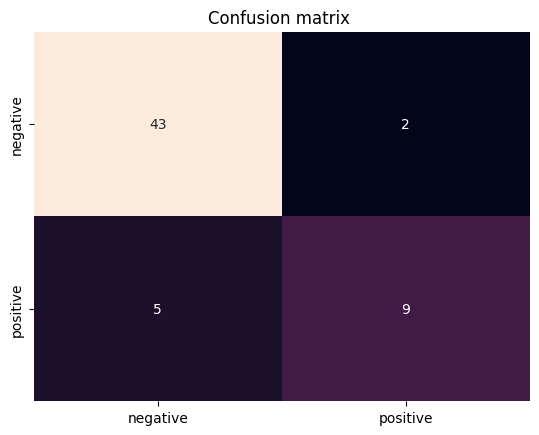

Метрики для test
Accuracy: 0.846
Precision: 0.800
Recall: 0.571
F1-measure: 0.667


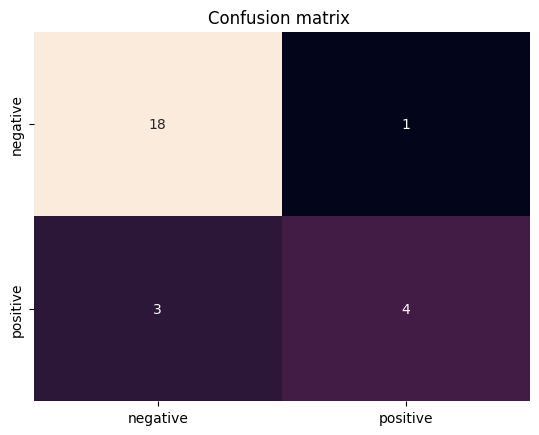

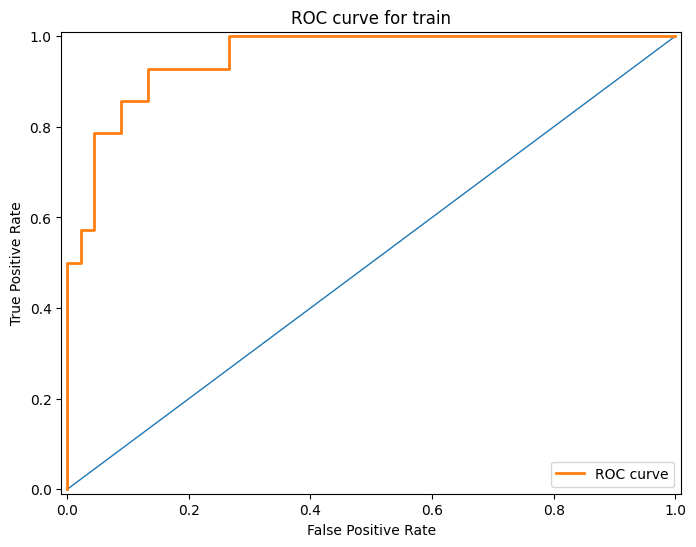

AUC = 0.954


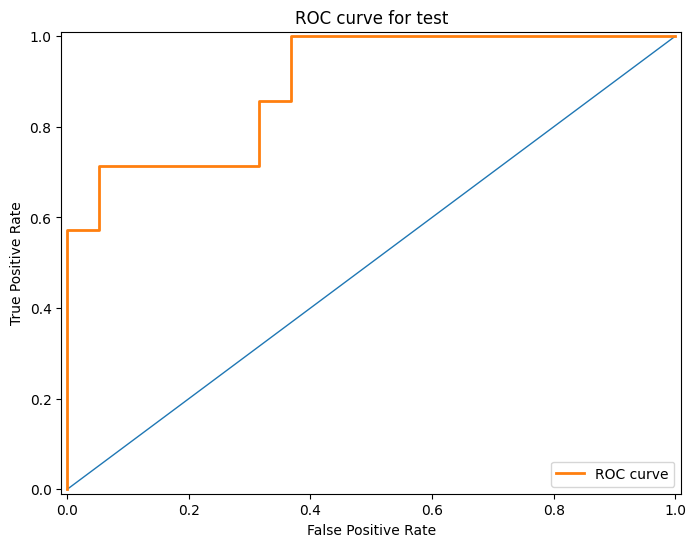

AUC = 0.895


In [44]:
X = data.drop(columns=['target', 'target_bin'])
y = data['target_bin']
model = LearnModel(LogisticRegression(),X,y)

Сравнивая метрики для train и test, стоит отметить что модель и там и там имеет высокий accuracy(0.881 и 0.846 соответственно). То есть модель хорошо справляется с задачей классификации. На test accuracy немного меньше, что предсказуемо при работе модели с новыми данными.  
Для удобного сравнения confusion matrix я рассчитал дополнительно recall и precision. Без этих метрик сложно сравнивать матрицы, так как в train и test разное кол-во элементов. На обоих выборках модель имеет достаточно высокий precision (0.818 и 0.8), что говорит о хорошей
способности избегать ложноположительных ошибок. Что касается recall, то он принимает более низкие значения (0.643 и 0.571 для train и test). Что говорит, о пропуске регионов с высоким уровнем преступности.   
Train (AUC = 0.954): Модель демонстрирует отличное качество классификации на обучающей выборке. Это говорит о том, что она хорошо различает классы.   
Test (AUC = 0.895): Значение AUC на тестовой выборке также очень высокое, что свидетельствует о том, что модель обладает хорошей обобщающей способностью.   
Разница между AUC на тренировочной и тестовой выборках небольшая (0.059), что указывает на отсутствие значительного переобучения.


---
Теперь найдем коэффициенты логистической регрессии и проинтерпретируем их


In [45]:
coefficients = pd.DataFrame({'Признак': X.columns,'Коэффициент': model.coef_[0]})
print(coefficients.sort_values(by='Коэффициент', ascending=False))
print(f'{np.abs(np.exp(np.array(model.coef_))-1)*100}')

  Признак  Коэффициент
3      x4     0.797570
2      x3     0.120084
1      x2     0.071498
4      x5    -0.104700
0      x1    -0.761930
5      x6    -2.006706
[[ 53.32353003   7.41158635  12.75910604 122.01396384   9.94049542
   86.55691951]]


$x_4$ Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации:   
Наибольшее положительное влияние: увеличение $x_4$ на 1 увеличивает шансы принадлежности к классу y=1 на 122.01%.   
$x_3$ Количество спортивных сооружений на 1000 человек:   
Увеличение $x_3$ на 1 повышает шансы на 12.76%, что указывает на умеренное положительное влияние этого признака.   
$x_2$ Уровень безработицы:  
Увеличение $x_2$ на 1 увеличивает шансы на 7.41%, что делает его наименее значимым положительным фактором.   
$x_5$ Прожиточный минимум:  
Увеличение $x_5$ на 1 уменьшает шансы на 9.94%, что является умеренным отрицательным эффектом.   
$x_1$ Процент населения людей региона в возрасте старше трудоспособного:  
Увеличение $x_1$ на 1 уменьшает шансы на 53.32%, делая его значимым отрицательным фактором.   
$x_6$ Ожидаемая продолжительность жизни при рождении (число лет):  
Наибольшее отрицательное влияние: увеличение
$x_6$ на 1 уменьшает шансы принадлежности к классу y=1
на 86.56%.   

Признаки Количество собственных легковых автомобилей
(положительное влияние) и Ожидаемая продолжительность жизни(отрицательное влияние) оказывают наибольшее влияние на модель.  
Остальные признаки имеют меньшее влияние, но Процент населения людей региона в возрасте старше трудоспособного
также значительно снижает вероятность принадлежности к классу y=1.  


Мы получили что положительно на вероятность влияют опять же инфраструктурные особенности региона и уровень безработицы, когда остальные признаки влияют отрицательно. Что похоже на 3 ГК из модели pca, где основное влияние происходило за счет этих признаков.
В целом модель обладает хорошей обобщающей способностью, что подтверждается высокими значениями метрик на тестовой выборке. Наиболее значимые признаки модели помогают объяснить вероятность принадлежности региона к положительному классу. Однако низкие значения recall указывают на возможность улучшения модели для повышения точности в обнаружении объектов первого класса

### 4)Применяя данные из предыдущего пункта построить модель Случайного леса (выбор случайного подмножества признаков, лучший признак для разделения узла определяется из подвыборки признаков ). Использовать разделение на обучающую и тестовую выборки. Аргументировать выбор количества деревьев и их глубины. Сравнить качество модели на обучении и тесте. Для оценки качества модели использовать метрики Accuracy, матрицу ошибок и ROC-кривую. Описать полученные результаты.

Выберем данные для train test

In [46]:
X = data.drop(columns=['target', 'target_bin'])
y = data['target_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Для начала с помощью grid search определим гиперпараметры случайного леса.В качестве метрики оценивания grid serach выберем accuracy. Также будем искать параметры с помощью 4 фолдовой кросс валидации. Параметры перебора показаны ниже.

In [47]:
parametrs = {
    'n_estimators': [10, 25, 50, 75, 100, 150,200,250],
    'max_depth': [2, 4, 8, 10, 16,32],
    'min_samples_split': [2, 4, 6,8,12,16]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parametrs,
    scoring='accuracy',
    cv=4,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Лучшие параметры: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 50}


Таким образом мы нашли лучшие параметры: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 50}. Теперь обучим модель рандомного леса.

Метрики для train
Accuracy: 0.983
Precision: 1.000
Recall: 0.929
F1-measure: 0.963


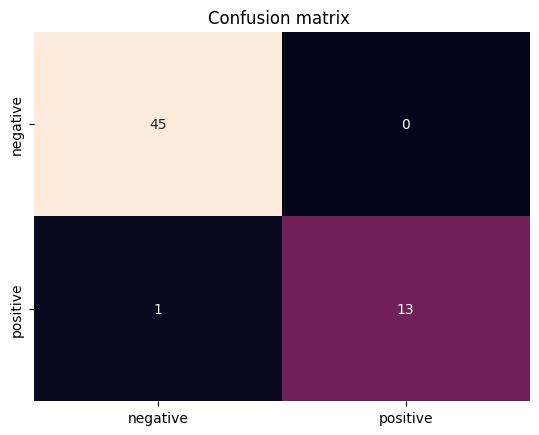

Метрики для test
Accuracy: 0.808
Precision: 0.667
Recall: 0.571
F1-measure: 0.615


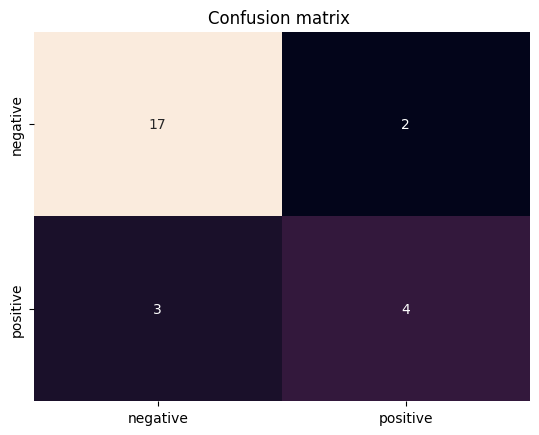

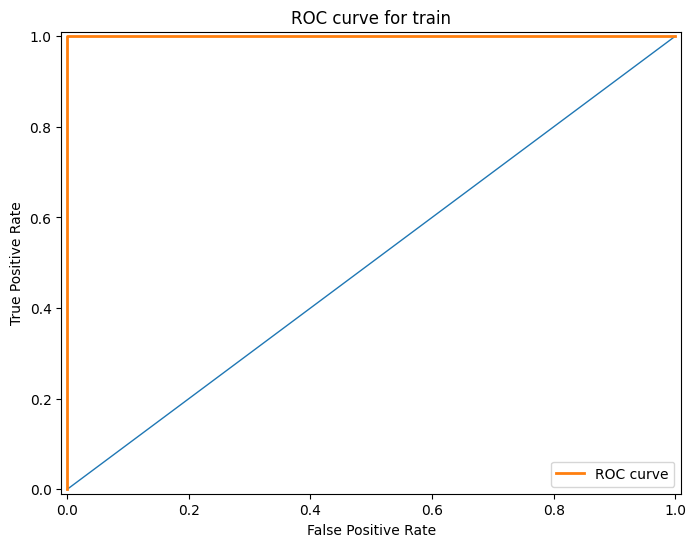

AUC = 1.000


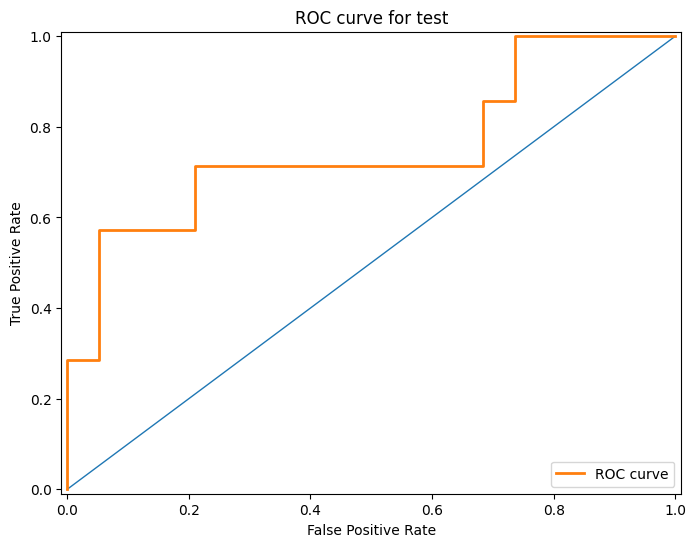

AUC = 0.752


In [74]:
model = RandomForestClassifier(n_estimators=50, max_depth=4,min_samples_split=4, random_state=42)
model = LearnModel(model,X,y)

Метрики для train
Accuracy: 0.983
Precision: 1.000
Recall: 0.929
F1-measure: 0.963
AUC = 1.  
Метрики для test
Accuracy: 0.808
Precision: 0.667
Recall: 0.571
F1-measure: 0.615
AUC = 0.752.  

На train все метрики близки к 1, модель отлично классифицирует данные, и совершает малое количество ошибок 1ого и 2ого рода. Train AUC: 1.000 — Идеальный AUC, что свидетельствует о том, что модель идеально различает классы на обучающих данных.   

Для test выборки:   
Accuracy: 0.808 — Значительно ниже Accuracy тренировочных данных. Это указывает на наличие переобучения, то есть модель слишком хорошо подогнана под обучающие данные и не может обобщить на новые данные.   
Precision: 0.667 — Значительно ниже accuracy, что означает, что модель ошибается чаще, предсказывая положительные классы, то есть у неё больше ложных положительных ошибок.   
Recall: 0.571 — модель пропускает довольно много положительных примеров.   
Test AUC: 0.752 — Значение AUC на тестовых данных значительно ниже, чем на обучающих (где оно равно 1). Это говорит о том, что модель имеет трудности с различием между классами на новых данных.     

Очень высокие метрики на обучающих данных (особенно AUC = 1.000) указывают на то, что модель слишком хорошо подогнана под обучающие данные, но она не обобщает хорошо на тестовые данные.Снижение всех метрик на тестовых данных подтверждает наличие переобучения.

Определить важность признаков, используя метод изменения информативности и метод Шэпли. Описать полученные результаты

In [75]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Gini': model.feature_importances_
}).sort_values(by='Gini', ascending=False)

print("MDI:")
print(feature_importances)

MDI:
  Feature      Gini
5      x6  0.417334
3      x4  0.174859
4      x5  0.138278
0      x1  0.115887
2      x3  0.093973
1      x2  0.059669


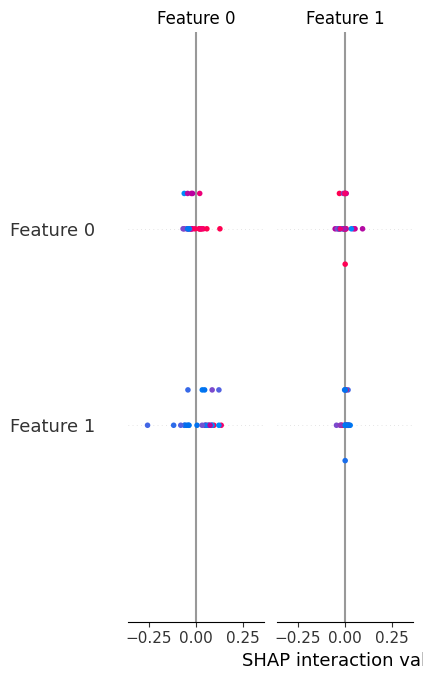

In [76]:
explainer = shap.Explainer(model)
shap.summary_plot(explainer(X_test), X_test, plot_type="bar")

Ожидаемая продолжительность жизни при рождении (число лет) x6 является самым важным признаком в нашей модели, что означает, что он наиболее сильно влияет на предсказания. Это признак, который содержит наиболее полезную информацию для разделения классов.   
Признаки x2 и x3 имеют минимальное влияние на модель. Это может означать, что эти признаки не так полезны и могут быть исключены из модели без значительного ухудшения её производительности.   
Признаки x4, x5, x1 имеют умеренное влияние на предсказания модели.  
Если сравнивать с влиянием коэффициентов логистической регрессии:   
Признак  Коэффициент  
x4     0.797570  
x3     0.120084  
x2     0.071498  
x5    -0.104700  
x1    -0.761930  
x6    -2.006706  
[ 53.32353003   7.41158635  12.75910604 122.01396384   9.94049542
   86.55691951].  
То здесь также x6 и x4 оказывают наибольшее влияние, а x2 и x3 наименьшее

### 5)Применяя алгоритм GBM решить задачу классификации. Оценить качество модели и важность признаков аналогично пункту 4. Описать полученные результаты (2 балла). Сравнить три модели классификации (логистическая регрессия, случайный лес, GBM), выбрать оптимальную и аргументировать свой выбор (1 балл). Для сравнения метрик качества моделей использовать тестовые выборки, для сравнения интерпретационных способностей -важность признаков.

Аналогично сначала с помощью gridsearch определим наилучшие параметры gbm

In [65]:
parametrs = {
    'learning_rate': [1e-3,1e-2,1e-1],
    'n_estimators': [10, 25, 50, 75, 100],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6,8],
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=parametrs,
                           scoring='accuracy', cv=8, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Лучшие параметры GBM:", grid_search.best_params_)

Fitting 8 folds for each of 240 candidates, totalling 1920 fits
Лучшие параметры GBM: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 75}


Таким образом мы нашли лучшие параметры: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 75}. Теперь обучим модель GBM.

Метрики для train
Accuracy: 0.949
Precision: 1.000
Recall: 0.786
F1-measure: 0.880


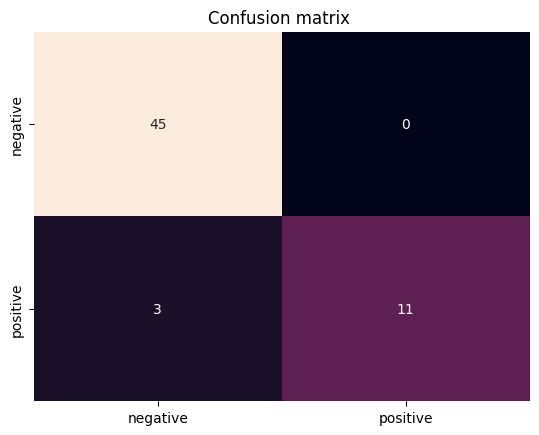

Метрики для test
Accuracy: 0.846
Precision: 0.800
Recall: 0.571
F1-measure: 0.667


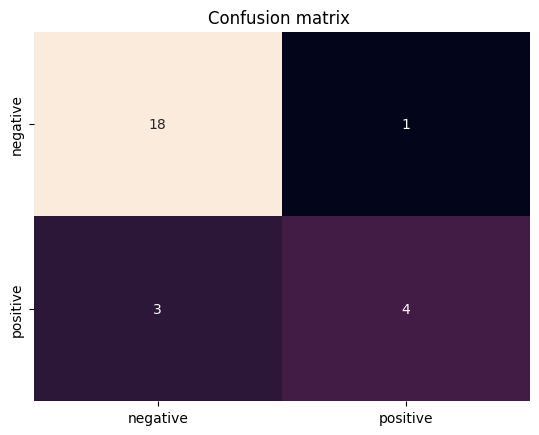

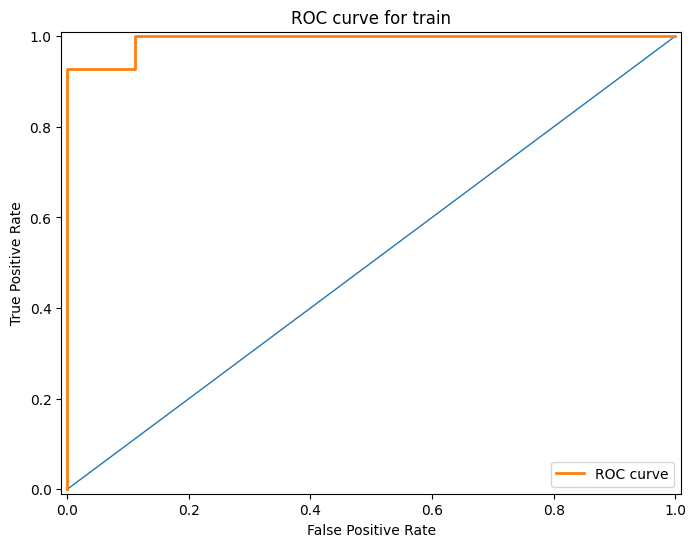

AUC = 0.992


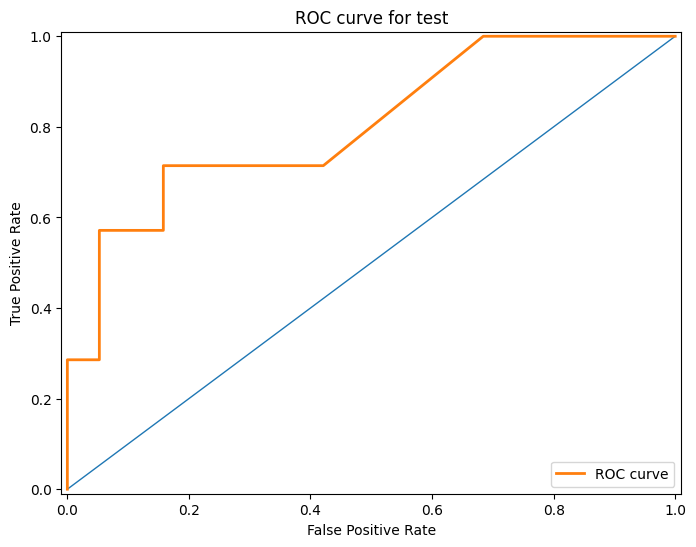

AUC = 0.805


In [77]:
model = GradientBoostingClassifier(learning_rate = 1e-2,n_estimators=75, max_depth=2,min_samples_split=2,subsample=0.6, random_state=42)
model = LearnModel(model,X,y)

Метрики для train
Accuracy: 0.949
Precision: 1.000
Recall: 0.786
F1-measure: 0.880.    
Метрики для test
Accuracy: 0.846
Precision: 0.800
Recall: 0.571
F1-measure: 0.667.    

Для train.  
Accuracy: 0.949  
Модель практически идеально классифицирует данные из обучающей выборки. Высокое значение Accuracy указывает на то, что модель хорошо подстроилась под тренировочные данные.  
Precision: 1.000  
Отсутствие ложноположительных классификаций на тренировочной выборке.   
Recall: 0.786  
Модель пропускает часть положительных примеров. Это говорит о том, что она не идеально подстроена даже для тренировочных данных, хотя её Precision максимален.   
F1-measure: 0.880   
Сбалансированная метрика показывает, что модель всё же делает ошибки на тренировочной выборке, хотя они незначительны.   
AUC = 0.992 — сильный признак того, что модель может быть переобученной, так как она почти безупречно различает классы на обучающих данных.  

Для test выборки:   
Accuracy: 0.846.  
Тестовая точность ниже, чем тренировочная (0.949). Это указывает на проблему генерализации: модель хуже справляется с новыми данными.  
Precision: 0.800  
Неплохой показатель, но он ниже, чем на тренировочных данных. Это говорит о том, что модель делает ложные положительные прогнозы на тестовой выборке.  
Recall: 0.571.  
Модель пропускает значительную часть положительных примеров.  
F1-measure: 0.667.
Снижение F1 указывает на несбалансированность Precision и Recall на тестовых данных.  
Test AUC: 0.805 - достойный показатель, модель хорошо классифицирует данные. Конечно в целом значение метрик уменьшилось на test, но не так сильно. С учетом того, что у нас мало данных - проблема переобучения сохраняется, но в меньшей степени


Определить важность признаков, используя метод изменения информативности и метод Шэпли. Описать полученные результаты

In [78]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Gini': model.feature_importances_
}).sort_values(by='Gini', ascending=False)

print("MDI:")
print(feature_importances)

MDI:
  Feature      Gini
5      x6  0.717255
2      x3  0.126642
0      x1  0.107649
3      x4  0.024186
4      x5  0.013970
1      x2  0.010298


описание важностей признаков

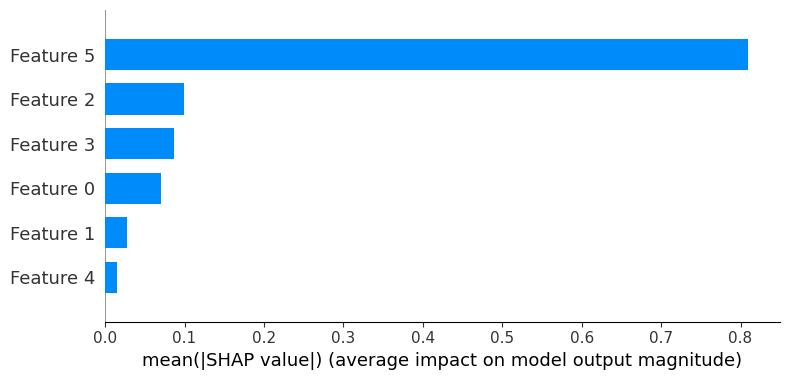

In [79]:
explainer = shap.Explainer(model)
shap.summary_plot(explainer(X_test), X_test, plot_type="bar")

На основании MDI:
Признак x6 (ожидаемая продолжительность жизни при рождении, число лет) является наиболее значимым для модели. Это говорит о том, что он оказывает наибольшее влияние на предсказания и содержит наиболее ценную информацию для разделения классов.
Признаки x2 и x5 имеют минимальное влияние, что может свидетельствовать о низкой полезности этих признаков. Их исключение из модели, вероятно, не приведёт к значительному ухудшению её производительности.
Признаки x4, x3 и x1 демонстрируют умеренное влияние на предсказания модели.

На основании SHAP:
Признак x6 также оказывается наиболее важным, подтверждая его ключевую роль в предсказаниях. Признаки x5 и x2 оказывают минимальное влияние, а остальные признаки, такие как x4 и x3, оказывают умеренное воздействие на результаты модели.

Сравнить три модели классификации (логистическая регрессия, случайный лес, GBM), выбрать оптимальную и аргументировать свой выбор (1 балл). Для сравнения метрик качества моделей использовать тестовые выборки, для сравнения интерпретационных способностей -важность признаков.

Сначала сравним качество моделей на тестовых выборках:  
  

1.  LogReg   
    Accuracy: 0.846  
    Precision: 0.800  
    Recall: 0.571  
    F1-measure: 0.667  
    AUC = 0.895  

Логистическая регрессия демонстрирует высокий AUC (0.895), что указывает на хорошую способность модели различать классы. Остальные метрики такие же как у GBM. Причем accuracy, precision,f1-score достаточно на высоком уровне.
2.  RandomForest  
    Accuracy: 0.808  
    Precision: 0.667  
    Recall: 0.571  
    F1-measure: 0.615  
    AUC = 0.752  

Случайный лес показал худшие результаты среди всех моделей. Хотя Recall равен 0.571, Precision и F1-measure ниже, чем у других моделей. AUC также значительно ниже (0.752), что указывает на более слабую способность различать классы.
    
3.  GBM  
    Accuracy: 0.846  
    Precision: 0.800  
    Recall: 0.571  
    F1-measure: 0.667  
    AUC = 0.805

Градиентный бустинг показывает те же метрики Accuracy, Precision, Recall и F1-measure, что и логистическая регрессия. Однако его AUC (0.805) ниже, чем у LogReg, что указывает на меньшую способность модели различать классы.  
Сравнение интерпретации моделей.  

Логистическая регрессия (LogReg):  
Простая интерпретация: коэффициенты модели дают прямое представление о влиянии каждого признака на предсказания.
Хорошо подходит для анализа значимости признаков.  
Случайный лес (Random Forest):  
Использует MDI для оценки значимости признаков.
Показатели значимости хорошо интерпретируются, но модель более сложная для объяснения, чем LogReg.  
Градиентный бустинг (GBM):  
Использует MDI и SHAP для оценки влияния признаков.  
SHAP даёт детальное и интерпретируемое представление о значимости каждого признака для каждого конкретного предсказания.
Однако интерпретация может быть сложнее из-за сложности модели.  

Итог:  
Логистическая регрессия является оптимальной моделью для данной задачи, поскольку она обеспечивает лучшее качество классификации по всем метрикам(лучше GBM из-за высокого AUC) и простоту интерпретации признаков.
